# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargamos todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls = pd.read_csv("megaline_calls.csv")
megaline_internet = pd.read_csv("megaline_internet.csv")
megaline_messages = pd.read_csv("megaline_messages.csv")
megaline_plans = pd.read_csv("megaline_plans.csv")
megaline_users = pd.read_csv("megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?
Al momento no, solo existen 2 datos y en todas las columnas hay valores no nulos. Inclusive, los tipos de datos para las columnas parecen ser los correos (Enteros, flotantes y texto). 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

#### Hasta el momento, no se ven problemas.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

#### No parece haber la necesidad de agregar factores adicionales.

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
megaline_users.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaN
258,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,NaN
66,1066,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-08,surf,NaN
285,1285,Joesph,Barry,28,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaN
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaN
171,1171,Devin,Wilkinson,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-01-27,surf,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
250,1250,Milan,Sellers,57,"Houston-The Woodlands-Sugar Land, TX MSA",2018-04-03,ultimate,NaN
81,1081,Grayce,Sears,44,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?

Hasta el momento, los cambios que serían pertinentes son en las columnas reg_date y churn_date, que deberían ser de tipo datetime. Principalmente porque nos pueden brindar información en la duración de las llamadas, qué cliente hizo más horas o minutos, entre otros. 
Otro dato importante a tener en cuenta es que churn_date tiene datos NaN, lo cual nos puede generar problemas al realizar el análisis. 


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
# Convertir las columnas 'reg_date' y 'churn_date' a datetime asegurando el formato correcto
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%d', errors='coerce')

# Corroboramos los tipos de datos.
display(megaline_users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
# Podemos indagar en los datos, ver si son datos reales o pudo haber algún defecto (Podría ocasionar algún outlier)
megaline_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [19]:
# Corroboramos que no existan valores duplicados
print(megaline_users["user_id"].nunique())

# Imprimimos la sumatoria de los valores duplicados
megaline_users.duplicated().sum()

500


0

## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Imprime una muestra de datos para las llamadas
megaline_calls.sample(15)


,id,user_id,call_date,duration
117215,1410_43,1410,2018-12-22,10.41
119249,1415_297,1415,2018-11-08,20.39
23211,1085_3,1085,2018-10-04,17.67
64094,1232_380,1232,2018-07-23,1.53
91731,1329_1002,1329,2018-11-15,11.17
242,1001_441,1001,2018-08-28,6.64
47132,1171_163,1171,2018-07-17,1.19
21128,1077_1095,1077,2018-08-26,0.00
112237,1394_162,1394,2018-12-29,8.71
95066,1336_1026,1336,2018-08-22,2.66


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?

Hasta ahorita, no se ve ningún valor nulo en todo el DF y las columnas parecen ser del tipo correcto (Congruente con la columna). A excepción de la columa call_date. Lo más correcto sería cambiarla a DateTime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
# Cambiamos la columna de "call_date" a datetime.
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')
print(megaline_calls.dtypes)

# Igual que en el caso anterior, 
# podemos indagar en los datos, ver si son datos reales o pudo haber algún defecto (Podría ocasionar algún outlier)
megaline_calls.describe()

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
print(megaline_calls['duration'].value_counts())
# Curiosamente, vemos que hay 26834 datos de duración 0.00. Podría ser un error, sin embargo, debido a la gran cantidad
# de datos, quizá sea por un escenario diferente (En el contexto de llamadas, quizá fueron llamadas que no se tomaron)
# Lo interesante es saber si estos datos afectan o apoyan nuestro análisis o, por el contrario, lo llenan de información
# "basura"


0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64


## Mensajes

In [26]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Imprime una muestra de datos para los mensajes
megaline_messages.sample(15)

,id,user_id,message_date
13963,1095_72,1095,2018-10-01
40885,1262_7,1262,2018-12-27
29356,1180_398,1180,2018-12-21
30814,1193_612,1193,2018-12-31
37323,1247_487,1247,2018-11-23
25707,1155_69,1155,2018-03-14
12766,1084_6,1084,2018-10-23
3932,1039_30,1039,2018-10-23
10569,1076_1288,1076,2018-09-11
60315,1381_428,1381,2018-10-07


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?

Igual que el caso anterior, el tipo de dato de "message_date" es texto. Tenemos que cambiarlo a DateTime.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [29]:
# Cambiamos el dato de message_date a datetime.
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')
# Verificamos el cambio
print(megaline_messages.dtypes)

# Corroboraos algún posible outlier.
print(megaline_messages.describe())

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [31]:
# Corroboramos el número de valores únicos. Que realmente concuerdan.
print(megaline_messages['id'].nunique(), megaline_messages['id'].count())


76051 76051


## Internet

In [32]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet.sample(15)


,id,user_id,session_date,mb_used
2247,1010_437,1010,2018-03-13,221.54
9362,1049_12,1049,2018-07-19,434.98
25142,1117_75,1117,2018-12-26,189.68
13873,1064_321,1064,2018-06-21,660.16
27490,1127_169,1127,2018-10-28,195.09
19088,1085_162,1085,2018-12-09,189.99
45622,1202_255,1202,2018-10-30,0.00
93327,1435_93,1435,2018-12-24,732.77
74717,1352_93,1352,2018-09-10,592.12
24542,1113_130,1113,2018-08-31,38.46


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?

Al momento, no hay valores nulos explícitos. La columna "session_date" es, nuevamente, de tipo texto; debemos convertirlo a DateTime. Incluso... No estoy seguro del ID como tipo Object; si bien un ID puede tener caracteres alfanuméricos, ¿Qué pasaría si hay valores repetidos? A menos que sea como SQL como PrimaryKey

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [36]:
# Convertimos la columna a tipo DateTime.
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')

# Verificamos el cambio
print(megaline_internet.dtypes)

# Buscamos algún dato extraño.
display(megaline_internet.describe())

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [37]:
# Pudiera servir obtener el total de MB usados al día
sum_mb = megaline_internet.groupby(megaline_internet['session_date'].dt.date)['mb_used'].sum()
display(sum_mb)

# E incluso aquellos días en los que no se usó nada
display(megaline_internet[megaline_internet['mb_used'] == 0]) 

session_date
2018-01-15      1193.90
2018-01-16      1776.09
2018-01-17      1202.33
2018-01-18       931.02
2018-01-19      2684.85
                ...    
2018-12-27    291749.27
2018-12-28    291703.03
2018-12-29    288687.21
2018-12-30    324013.99
2018-12-31    304138.13
Name: mb_used, Length: 351, dtype: float64

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [38]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [39]:
# Agregamos los datos por período para facilitar el análisis.
megaline_calls["period"] = pd.to_datetime(megaline_calls["call_date"]).dt.to_period('M')
megaline_messages['period'] = pd.to_datetime(megaline_messages["message_date"]).dt.to_period('M')
megaline_internet['period'] = pd.to_datetime(megaline_internet['session_date']).dt.to_period('M')


In [40]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = megaline_calls.groupby(['user_id', 'period']).agg(calls=('id', 'count')).reset_index()
display(calls_per_month)

,user_id,period,calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [41]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = megaline_calls.groupby(['user_id', 'period']).agg(total_minutes=('duration', 'sum')).reset_index()

display(minutes_per_month)

,user_id,period,total_minutes
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [42]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = megaline_messages.groupby(['user_id', 'period']).agg(total_messages=('id', 'count')).reset_index()
display(messages_per_month)

,user_id,period,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [43]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = megaline_internet.groupby(['user_id', 'period']).agg(total_internet =('mb_used', 'sum')).reset_index()
display(internet_per_month)

,user_id,period,total_internet
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [44]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Hacemos el merge de los datos.
user_monthly_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'period'], how='outer')
user_monthly_data = user_monthly_data.merge(messages_per_month, on=['user_id', 'period'], how='outer')
user_monthly_data = user_monthly_data.merge(internet_per_month, on=['user_id', 'period'], how='outer')

display(user_monthly_data)


,user_id,period,calls,total_minutes,total_messages,total_internet
0,1000,2018-12,16.0,116.83,11.0,1901.47
1,1001,2018-08,27.0,171.14,30.0,6919.15
2,1001,2018-09,49.0,297.69,44.0,13314.82
3,1001,2018-10,65.0,374.11,53.0,22330.49
4,1001,2018-11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91
2289,1361,2018-05,NaN,NaN,2.0,1519.69
2290,1482,2018-10,NaN,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,NaN,233.17


In [46]:
# Añade la información de la tarifa
user_monthly_data = user_monthly_data.merge(megaline_users[['user_id', 'plan']], on='user_id', how='left')

display(user_monthly_data)

,user_id,period,calls,total_minutes,total_messages,total_internet,plan
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91,surf
2289,1361,2018-05,NaN,NaN,2.0,1519.69,surf
2290,1482,2018-10,NaN,NaN,2.0,NaN,ultimate
2291,1108,2018-12,NaN,NaN,NaN,233.17,ultimate


In [47]:
# Nos ayudaría cambiar el nombre de la columna "plan" a "plan_name" para que sea más descriptivo.
user_monthly_data.rename(columns={'plan': 'plan_name'}, inplace=True)

# Corroboramos el cambio
print(user_monthly_data.columns)

Index(['user_id', 'period', 'calls', 'total_minutes', 'total_messages',
       'total_internet', 'plan_name'],
      dtype='object')


In [48]:
# Hacemos un merge de los planes con user_monthly_data para poder ver los beneficios del plan de cada usuario.
user_monthly_data = user_monthly_data.merge(megaline_plans, on='plan_name', how='left')

# Obtenemos una muestra para ver el merge recién hecho
user_monthly_data.sample(15)

,user_id,period,calls,total_minutes,total_messages,total_internet,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
324,1070,2018-12,45.0,297.04,17.0,15401.48,surf,50,15360,500,20,10,0.03,0.03
348,1074,2018-11,11.0,99.71,NaN,866.51,ultimate,1000,30720,3000,70,7,0.01,0.01
1171,1254,2018-11,68.0,532.93,91.0,20514.22,surf,50,15360,500,20,10,0.03,0.03
349,1074,2018-12,90.0,585.21,NaN,10802.82,ultimate,1000,30720,3000,70,7,0.01,0.01
281,1062,2018-09,36.0,192.05,8.0,14532.52,ultimate,1000,30720,3000,70,7,0.01,0.01
284,1062,2018-12,39.0,244.73,9.0,14550.10,ultimate,1000,30720,3000,70,7,0.01,0.01
462,1099,2018-09,74.0,463.20,24.0,17353.26,surf,50,15360,500,20,10,0.03,0.03
238,1055,2018-11,28.0,221.20,95.0,14972.39,surf,50,15360,500,20,10,0.03,0.03
1068,1232,2018-08,79.0,599.80,NaN,15929.76,surf,50,15360,500,20,10,0.03,0.03
1371,1303,2018-12,18.0,112.29,148.0,25042.66,ultimate,1000,30720,3000,70,7,0.01,0.01


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [49]:
# Calcula el ingreso mensual para cada usuario.

# Redondeamos el internet usado mensualmente
user_monthly_data['total_gb'] = np.ceil(user_monthly_data['total_internet'] / 1024)

In [50]:
# Obtenemos la diferencia extra
user_monthly_data['extra_minutes'] = user_monthly_data['total_minutes'] - user_monthly_data['minutes_included']
user_monthly_data['extra_messages'] = user_monthly_data['total_messages'] - user_monthly_data['messages_included']
user_monthly_data['extra_gb'] = user_monthly_data['total_gb'] - user_monthly_data['mb_per_month_included'] / 1024

In [51]:
# Reemplazamos los valores negativos que nos dio.
# Aquí la función que sirve para limitar los valores nos ayudará mucho.
user_monthly_data['extra_minutes'] = user_monthly_data['extra_minutes'].clip(lower=0)
user_monthly_data['extra_messages'] = user_monthly_data['extra_messages'].clip(lower=0)
user_monthly_data['extra_gb'] = user_monthly_data['extra_gb'].clip(lower=0)

In [52]:
# Realizamos los cálculos pertinentes
user_monthly_data['cost_extra_minutes'] = user_monthly_data['extra_minutes'] * user_monthly_data['usd_per_minute']
user_monthly_data['cost_extra_messages'] = user_monthly_data['extra_messages'] * user_monthly_data['usd_per_message']
user_monthly_data['cost_extra_gb'] = user_monthly_data['total_gb'] * user_monthly_data['usd_per_gb']

In [53]:
# Rellenamos los posibles valores NaN que tengamos.
user_monthly_data['cost_extra_minutes'] = user_monthly_data['cost_extra_minutes'].fillna(0)
user_monthly_data['cost_extra_messages'] = user_monthly_data['cost_extra_messages'].fillna(0)
user_monthly_data['cost_extra_gb'] = user_monthly_data['cost_extra_gb'].fillna(0)

In [54]:
# Calculamos el ingreso mensual final.
user_monthly_data['monthly_revenue'] = ( user_monthly_data['usd_monthly_pay'] + user_monthly_data['cost_extra_minutes'] 
+ user_monthly_data['cost_extra_messages'] + user_monthly_data['cost_extra_gb']  )

In [55]:
display(user_monthly_data[['user_id', 'period', 'monthly_revenue',"usd_monthly_pay","cost_extra_minutes","cost_extra_messages","cost_extra_gb"]].sample(20))


,user_id,period,monthly_revenue,usd_monthly_pay,cost_extra_minutes,cost_extra_messages,cost_extra_gb
1043,1224,2018-10,196.0000,70,0.0000,0.00,126.0
2218,1492,2018-09,60.0000,20,0.0000,0.00,40.0
2060,1454,2018-09,238.0000,70,0.0000,0.00,168.0
2278,1194,2018-08,80.0000,20,0.0000,0.00,60.0
1966,1429,2018-12,90.0000,20,0.0000,0.00,70.0
1049,1226,2018-11,203.0000,70,0.0000,0.00,133.0
687,1148,2018-12,203.2079,20,2.4279,0.78,180.0
1027,1222,2018-06,20.0000,20,0.0000,0.00,0.0
1905,1414,2018-08,30.0000,20,0.0000,0.00,10.0
1793,1393,2018-10,20.0000,20,0.0000,0.00,0.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

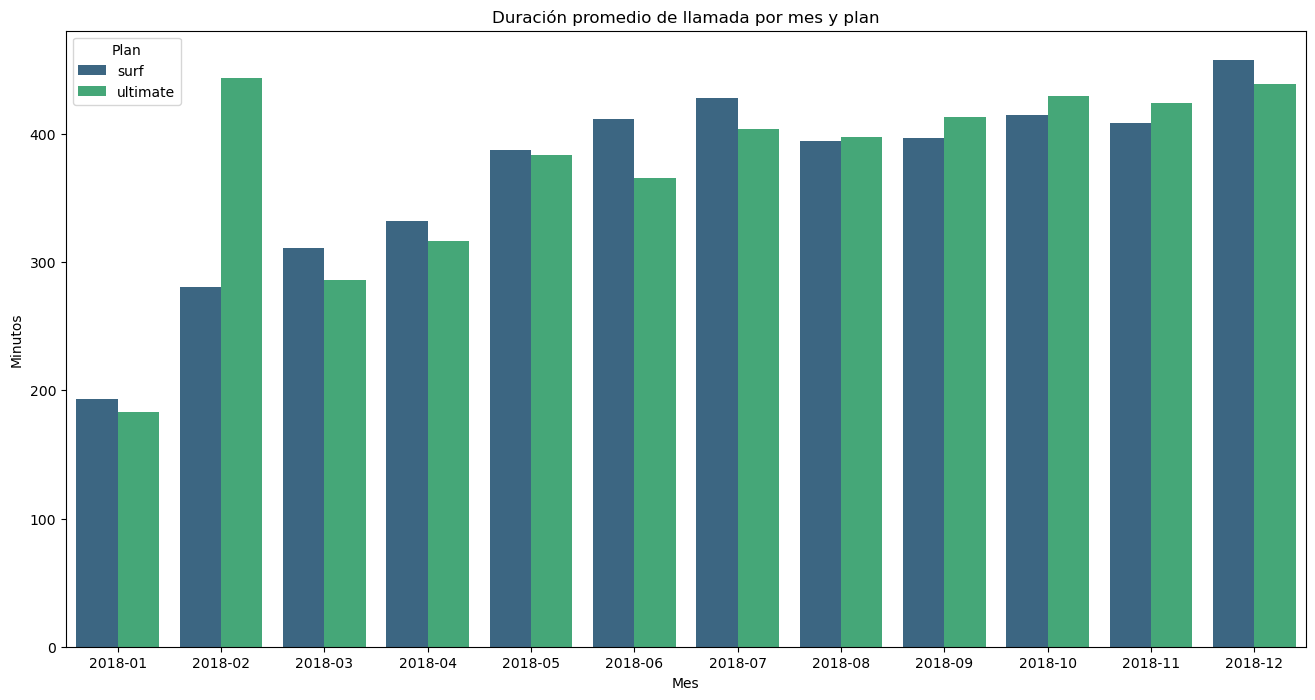

In [61]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_call_duration_by_plan = user_monthly_data.groupby(['plan_name', 'period'])['total_minutes'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(data=avg_call_duration_by_plan, x='period', y='total_minutes', palette='viridis',hue='plan_name')
plt.title('Duración promedio de llamada por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.legend(title='Plan') 
plt.show()

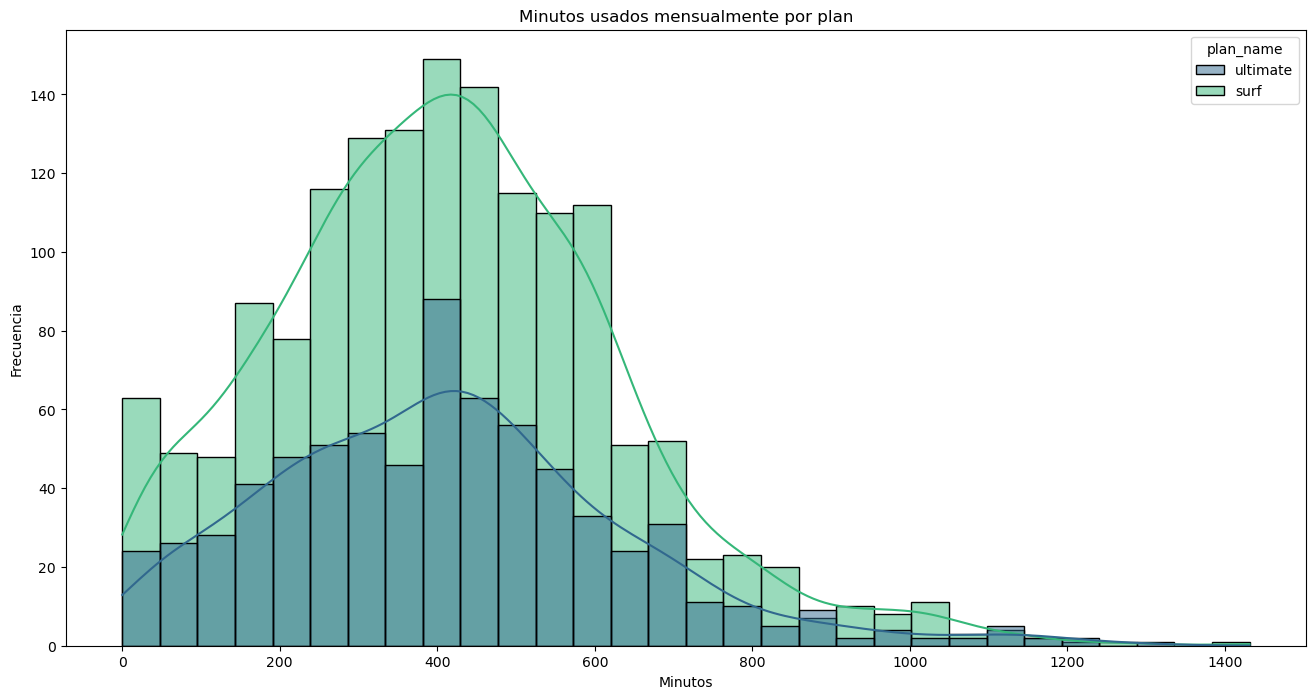

In [66]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(16, 8))
sns.histplot(data=user_monthly_data, x='total_minutes', hue='plan_name', kde=True, bins=30, palette='viridis')
plt.title('Minutos usados mensualmente por plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [67]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats_by_plan = user_monthly_data.groupby('plan_name')['total_minutes'].agg(['mean', 'var']).reset_index()

display(call_stats_by_plan)

,plan_name,mean,var
0,surf,412.097890,47001.254231
1,ultimate,410.180954,50510.631705


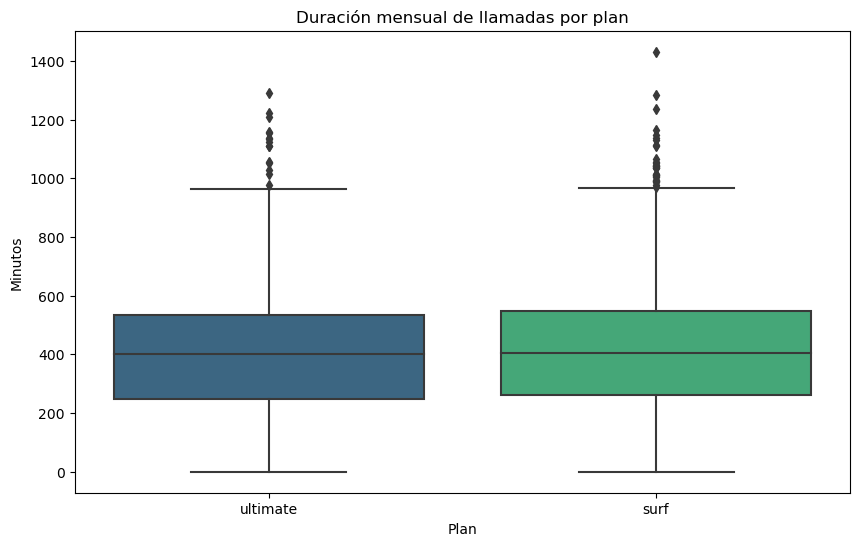

In [68]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_data, x='plan_name', y='total_minutes', palette='viridis')
plt.title('Duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()

### [Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Ambas medias de duración son muy similares, tanto para "Surf" como "Ultimate". No existe una diferencia significativa en el comportamiento general de los usuarios de ambos planes.

En cambio, la varianza sí tiene una diferencia significativa, 3,509.3. Esto nos puede dar a entender que los usuarios de "Ultimate" tienen llamadas más largas, comparándolas con los del plan "Surf".

Aunque también podríamos suponer que, los usuarios "Ultimate" hacen llamadas más largas a comparación de los del plan "Surf", que si bien son más los usuarios que exceden estos límites.

### Mensajes

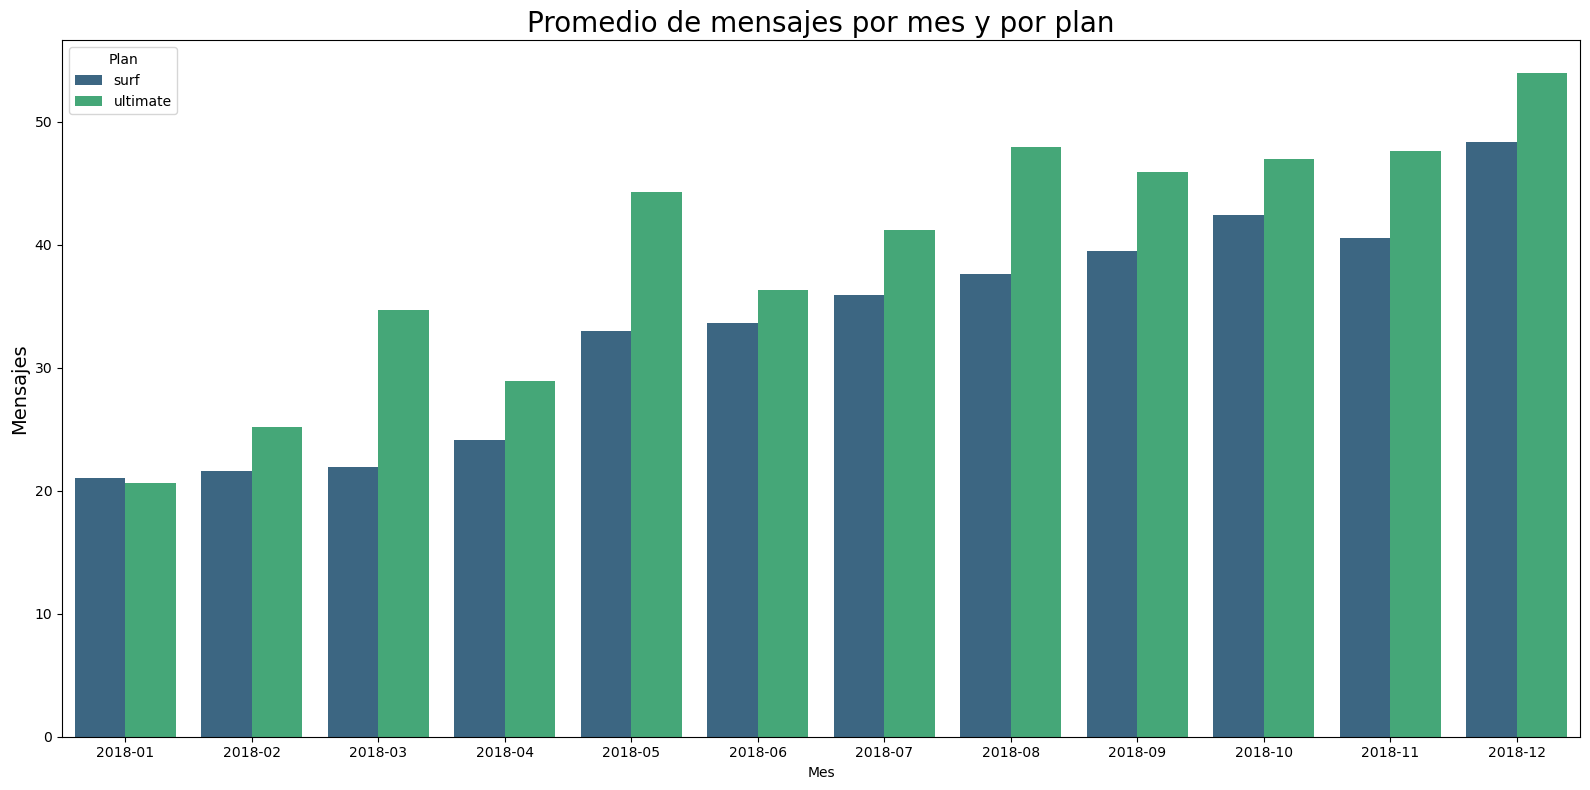

In [72]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Calculamos el promedio de mensajes enviados por cada mes y cada plan
avg_messages_by_month_plan = user_monthly_data.groupby(['period', 'plan_name'])['total_messages'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(data=avg_messages_by_month_plan,x='period', y='total_messages', hue='plan_name', palette='viridis'
)

plt.title("Promedio de mensajes por mes y por plan", fontsize=20)
plt.xlabel("Mes")
plt.ylabel("Mensajes", fontsize=14)
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

Vemos que ambos planes fueron incrementando el número de mensajes enviados. En todos los meses del 2018 los usuarios del plan "Ultimate" enviaban más mensajes a comparación de los usuarios del plan "Surf".

### Internet

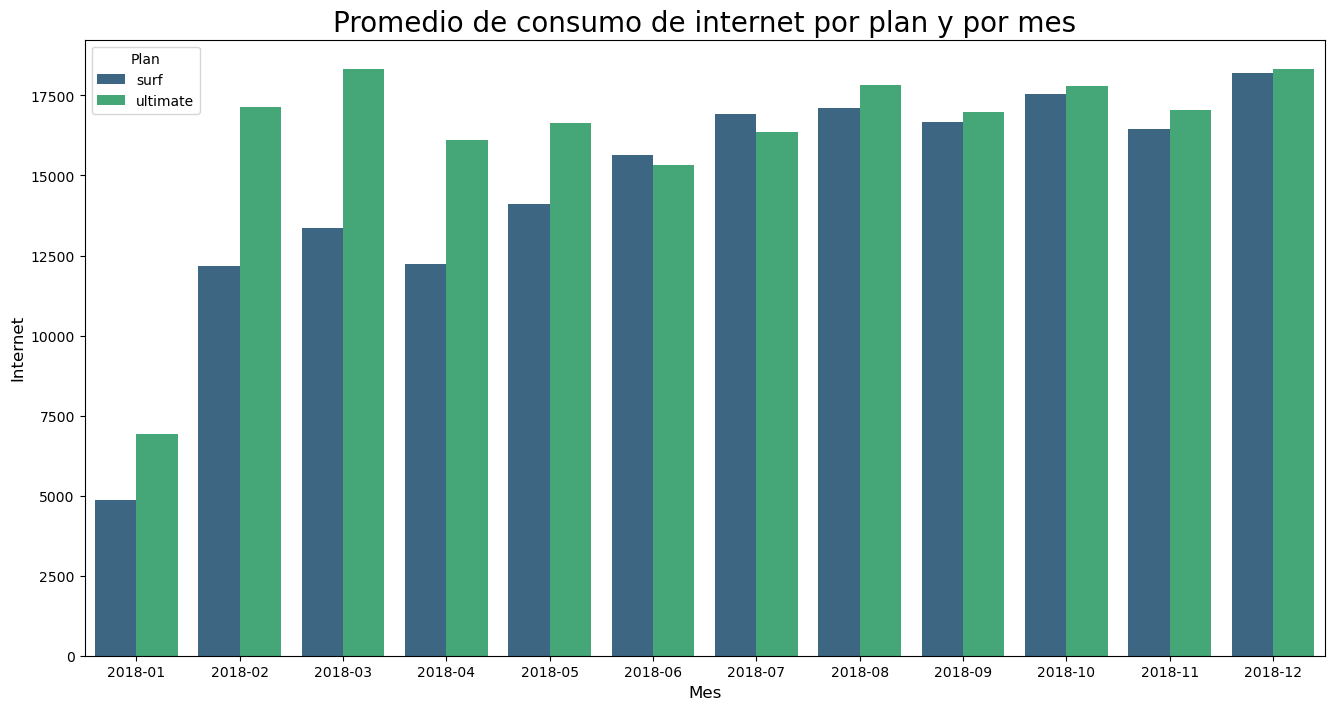

In [73]:
avg_internet_by_month_plan = user_monthly_data.groupby(['period', 'plan_name'])['total_internet'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(data=avg_internet_by_month_plan,x='period', y='total_internet', hue='plan_name', palette='viridis')

# Personalizar el gráfico
plt.title("Promedio de consumo de internet por plan y por mes", fontsize=20)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Internet", fontsize=12)
plt.legend(title="Plan", fontsize=10)
plt.show()

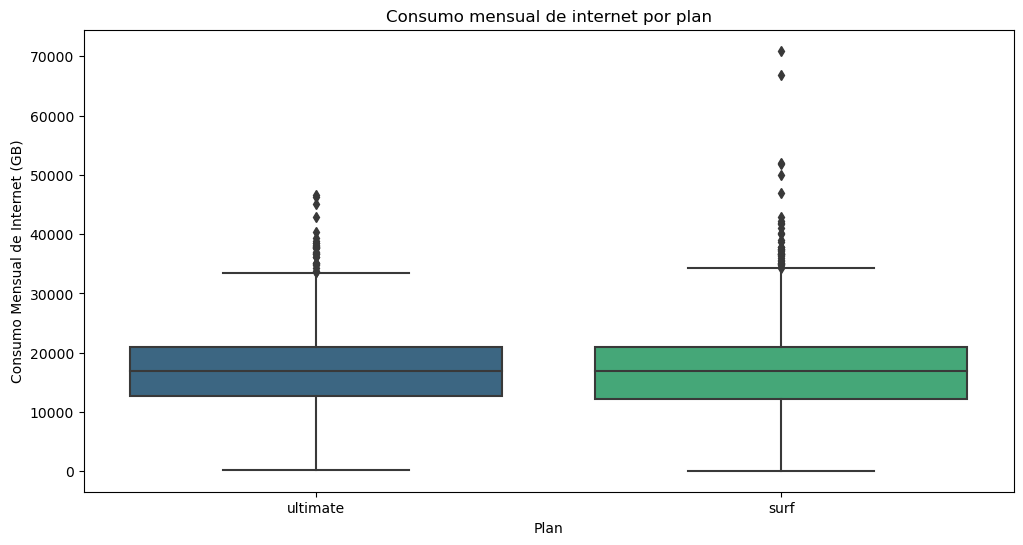

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_monthly_data, x='plan_name', y='total_internet', palette='viridis')
plt.title('Consumo mensual de internet por plan')
plt.xlabel('Plan')
plt.ylabel('Consumo Mensual de Internet (GB)')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Ambos planes aumentaron el uso promedio de internet en todo el año. Aunque el plan "Ultimate" tiene un consumo más elevado a comparación del plan "Surf". Esto podría significar que los usuarios del plan "Ultimate" necesitan más uso de internet y/o datos móviles (Lo cual sería congruente de porqué pidieron / necesitaban este plan, quizá).

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

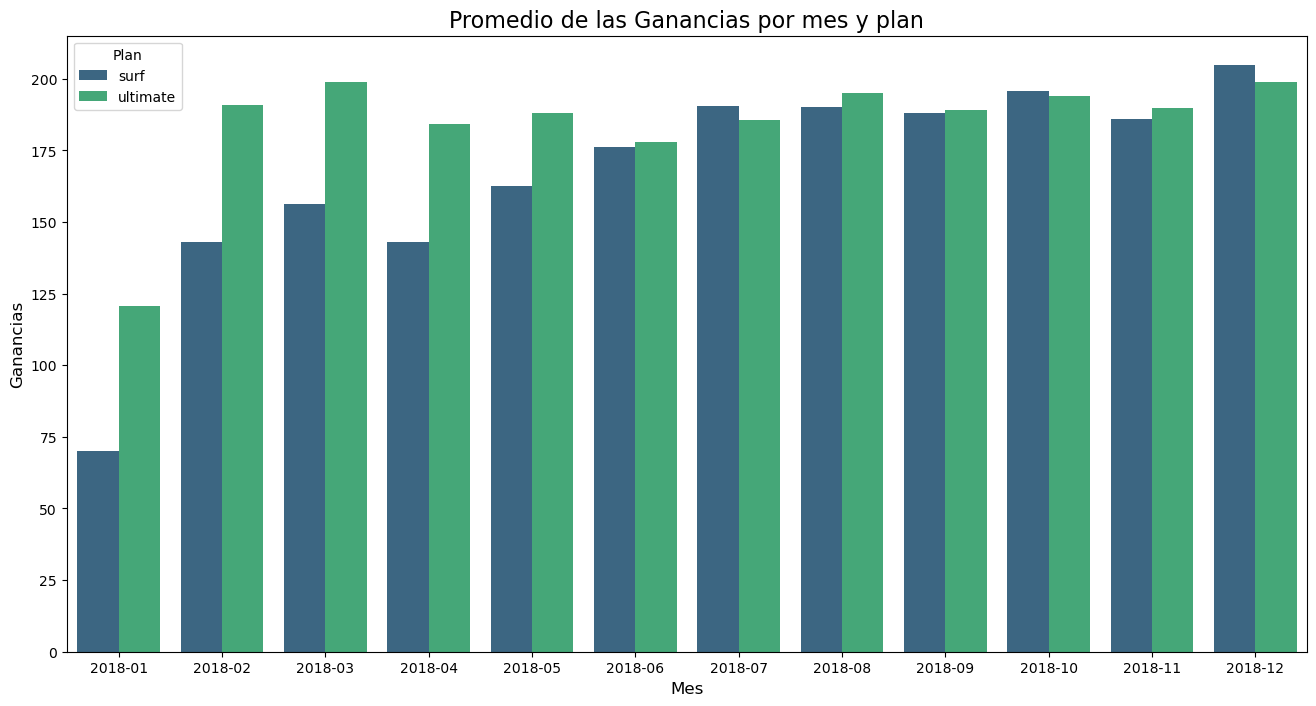

In [75]:
avg_monthly_revenue_by_plan = user_monthly_data.groupby(['period', 'plan_name'])['monthly_revenue'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(data=avg_monthly_revenue_by_plan,x='period', y='monthly_revenue', hue='plan_name', palette='viridis')

plt.title("Promedio de las Ganancias por mes y plan", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ganancias", fontsize=12)
plt.legend(title="Plan", fontsize=10)
plt.show()

In [76]:
avg_monthly_revenue_by_plan = user_monthly_data.groupby(['plan_name'])['monthly_revenue'].mean().reset_index()
display(avg_monthly_revenue_by_plan)



,plan_name,monthly_revenue
0,surf,188.382019
1,ultimate,191.148611


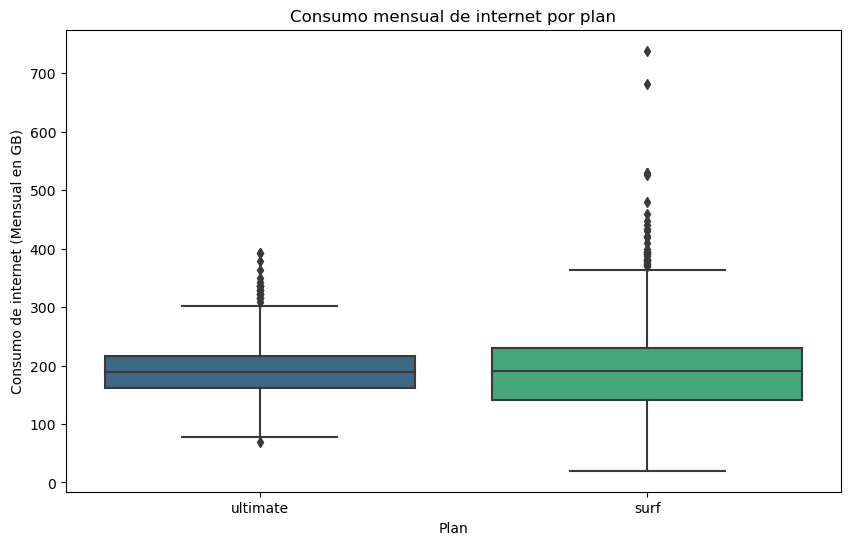

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_data, x='plan_name', y='monthly_revenue', palette='viridis')
plt.title('Consumo mensual de internet por plan')
plt.xlabel('Plan')
plt.ylabel('Consumo de internet (Mensual en GB)')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

De igual manera que en los casos anteriores, ambos planes fueron aumentando las ganancias promedio a lo largo del año. Siendo el plan "Ultimate" el que más ganancias generó. 

Quizá por mayor demanda de recursos generan más ingresos (Necesitan más internet u otros servicios). 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis nula (Ho): Los ingresos promedio de los planes Ultimate y Surf son iguales.

Hipótesis alternativa (Ha): Los ingresos promedio de los planes Ultimate y Surf son diferentes.

Prueba estadística: Usamos una prueba t de Student para muestras dependientes. Estamos comparando promedios de dos grupos independientes.  

Nivel de significancia: alpha = 0.05

In [78]:
# Importamos la librería necesaria para la prueba de hipótesis.
from scipy.stats import ttest_ind

# Filtramos los datos por plan.
ultimate_revenue = user_monthly_data[user_monthly_data['plan_name'] == 'ultimate']['monthly_revenue']
surf_revenue = user_monthly_data[user_monthly_data['plan_name'] == 'surf']['monthly_revenue']


# Eliminamos los valores NaN
ultimate_revenue = ultimate_revenue.dropna()
surf_revenue = surf_revenue.dropna()
alpha = 0.05

# Hacemos la prueba.
t_stat, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Realizamos la prueba de hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio entre los planes son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No podemos afirmar si los ingresos promedio entre ambos planes son diferentes.")

Estadístico t: 0.9782
Valor p: 0.3281
No podemos rechazar la hipótesis nula: No podemos afirmar si los ingresos promedio entre ambos planes son diferentes.


Conclusiones: 
- El estadístico t (0.9782) indica una diferencia leve entre las medias de los ingresos promedio de los planes Ultimate y Surf.
- El valor p (0.3281) es considerablemente mayor al nivel de significancia típico ( \alpha = 0.05 ), lo que significa que no hay suficiente evidencia estadística para rechazar la hipótesis nula.
- Como no se puede rechazar la hipótesis nula, concluimos que no hay diferencias estadísticamente significativas en los ingresos promedio entre los dos planes.
- Los usuarios de ambos planes tienen patrones de consumo que resultan en ingresos medios comparables.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
- Hipótesis nula (Ho): El ingreso promedio de los usuarios de la región NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.
- Hipótesis alternativa (Ha): El ingreso promedio de los usuarios de la región NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.
-Prueba estadística: Utilizaremos una prueba t de Student para muestras independientes, ya que estamos comparando los promedios de dos grupos independientes (usuarios de dos planes diferentes).
- Nivel de significancia: Elegimos un \alpha = 0.05.

In [80]:
# Extraemos la parte final, incluyendo casos con múltiples códigos de estado separados por guiones
megaline_users['region'] = megaline_users['city'].str.extract(r', ([A-Z-]+ MSA)$')

# Verificar con registros aleatorios para confirmar
print(megaline_users[['city', 'region']].sample(10))

                                          city        region
352            Seattle-Tacoma-Bellevue, WA MSA        WA MSA
408          Baltimore-Columbia-Towson, MD MSA        MD MSA
393                          Knoxville, TN MSA        TN MSA
498  New York-Newark-Jersey City, NY-NJ-PA MSA  NY-NJ-PA MSA
105              Providence-Warwick, RI-MA MSA     RI-MA MSA
325        Dallas-Fort Worth-Arlington, TX MSA        TX MSA
37             Seattle-Tacoma-Bellevue, WA MSA        WA MSA
277  New York-Newark-Jersey City, NY-NJ-PA MSA  NY-NJ-PA MSA
359                   Colorado Springs, CO MSA        CO MSA
331        Dallas-Fort Worth-Arlington, TX MSA        TX MSA


In [81]:
# Extraer región del DataFrame megaline_users 
user_monthly_data = user_monthly_data.merge(megaline_users[['user_id', 'region']],on='user_id',how='left')
user_monthly_data.sample(15)

,user_id,period,calls,total_minutes,total_messages,total_internet,plan_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,total_gb,extra_minutes,extra_messages,extra_gb,cost_extra_minutes,cost_extra_messages,cost_extra_gb,monthly_revenue,region
1679,1367,2018-11,20.0,97.13,NaN,17176.25,surf,50,15360,500,...,0.03,17.0,0.00,NaN,2.0,0.0000,0.0,170.0,190.0000,MD MSA
1011,1217,2018-10,75.0,494.12,NaN,21224.93,surf,50,15360,500,...,0.03,21.0,0.00,NaN,6.0,0.0000,0.0,210.0,230.0000,OH MSA
851,1182,2018-07,37.0,242.96,NaN,21181.50,surf,50,15360,500,...,0.03,21.0,0.00,NaN,6.0,0.0000,0.0,210.0,230.0000,NC-SC MSA
1729,1381,2018-11,58.0,449.97,180.0,23676.26,surf,50,15360,500,...,0.03,24.0,0.00,130.0,9.0,0.0000,3.9,240.0,263.9000,TX MSA
1139,1249,2018-06,81.0,476.61,32.0,16483.84,ultimate,1000,30720,3000,...,0.01,17.0,0.00,0.0,0.0,0.0000,0.0,119.0,189.0000,OH-KY-IN MSA
893,1191,2018-06,64.0,413.32,15.0,16433.76,ultimate,1000,30720,3000,...,0.01,17.0,0.00,0.0,0.0,0.0000,0.0,119.0,189.0000,MO-IL MSA
1691,1370,2018-09,61.0,426.10,15.0,9120.39,ultimate,1000,30720,3000,...,0.01,9.0,0.00,0.0,0.0,0.0000,0.0,63.0,133.0000,CA MSA
1371,1303,2018-12,18.0,112.29,148.0,25042.66,ultimate,1000,30720,3000,...,0.01,25.0,0.00,0.0,0.0,0.0000,0.0,175.0,245.0000,MI MSA
1363,1300,2018-11,46.0,314.19,NaN,14956.49,surf,50,15360,500,...,0.03,15.0,0.00,NaN,0.0,0.0000,0.0,150.0,170.0000,NY-NJ-PA MSA
741,1159,2018-09,120.0,759.40,107.0,17015.76,ultimate,1000,30720,3000,...,0.01,17.0,0.00,0.0,0.0,0.0000,0.0,119.0,189.0000,FL MSA


In [82]:
from scipy.stats import ttest_ind

# Filtrar usuarios por región
ny_nj_users = user_monthly_data[user_monthly_data['region'] == 'NY-NJ-PA MSA']['monthly_revenue']
other_users = user_monthly_data[user_monthly_data['region'] != 'NY-NJ-PA MSA']['monthly_revenue']

# Realizar la prueba t de dos muestras independientes
stat, p_value = ttest_ind(ny_nj_users.dropna(), other_users.dropna(), equal_var=False)

# Mostrar resultados
alpha = 0.05
print("Estadístico t:", stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: El ingreso promedio de los usuarios de NewYork-NewJersey es diferente al de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")

Estadístico t: 0.0251032353951928
Valor p: 0.9799815709009154
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.


### Conclusiones del análisis

La variable T obtenida es cercano a 0, o sea, las medias de los ingresos entre los usuarios de ambas regiones (New York y New Jersey) y los de otras regiones son muy similares. No tenemos tampoco suficiente evidencia estadística para rechazar la hipótesis nula. 
Tampoco existe evidencia fuerte para respaldar que la ubicación geográfica influya de alguna manera con los ingresos promedio.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

### Plan

Respecto a los diferentes planes, tanto los usuarios del plan "Surf" como "Ultimate" tienen una duración promedio mensual muy parecido de llamadas. Ambos planes parecen ser usados de manera similar. Sin embargo, existen ligeras variaciones para los mensajes de ambos planes, aunque no significativas. Podríamos concluir que no hay demasiada diferencia en la cuestión de los mensajes de ambos planes, así como el uso de internet o datos; ya que ambos mostraron patrones y datos muy parecidos.

Ahora, respecto a los ingresos, estos tampoco tienen una diferencia significativa entre sí. De igual manera tampoco existe una correlación con el área geográfica de los usuarios (New York y New Jersey). 